# PRACTICAL 2 (WEEK 7): Correlation and Regression (and more plots)

By the end of this practical you should be able to:
* Aggregate data in R by factors
* Save data to a csv file
* Produce scatter plots and line plots from bivariate data, and be able to format them
* Carry out Pearson and Spearman correlations with R
* Generate a line fitting estimate from a regression model in R

Before we get started, remember we need to import the packages we need. We did this in the previous practical and we need to do it each time we start a new sessions with R.

the packages we need are the same as last weke and can be loaded with the command below. Type this into the code cell below to do this now:

`library(tidyverse)`

## Part 1: A recap from last week!

If you look in the week 7 folder you should see 2 csv data files. We are going to start with the file named <b>"TayAtBallathie.csv"</b> which contains measured water flowrates from the Tay river from 1960 to 2000. 

Load this file into R as you did last week using the cell below. <b>Make sure the object you load is called `tay` when you read it in.</b>

Try and remember how you did this last week. If you can't, refer back to last week’s notebook (you can have more than one notebook open at once in different browser tabs!). There is also a hint below if you need to refresh!


<b>HINT</b>: Remember the following commands from last week to help you:

* `list.files()` - Lists all files in the current directory
* `tay <- read_csv("TayAtBallathie.csv")`

## Exercise 1
Once you have read in the data, remember back to the commands from last week to view the raw data in different ways. Use the code cells below this one to write these commands and figure out how many **observations** are in the dataset? What about **variables**?

Hints below if you forget the commands (and remember the answers are at the end of the notebook)! 

Remember to put the name of the data in the brackets when the command requires it! 

<b>Hint</b>: Typing in the name of the data (`tay` in this case) as well as:

* `NameOfData` - type the name of the data to get a summary (e.g. `tay`), note this command does not need brackets!
* `head()` - to view the first few rows of data
* `dim()` - to view the dimensions

***
Remember about the importance of making sure the variable types are correct? We also need to change the **Month** and **Year** variables in the Tay data to make sure they are **factor** (or **fct** in R terms) variables. Let's do this now in the cells below (remember to look at last weeks notebook for how to do this but see hint below if you get stuck figuring out the command). Remember to view the data again to make sure the changes have been made.
    

**Hint:**

`tay$Month <- factor(tay$Month)`

`tay$Year <- factor(tay$Year)`


Let's also practice creating a histogram. There are 4 variables – which one makes sense for a histogram?

Can you remember how to do this from last week?

<b>HINT</b> Remember to think through what each part of the code is doing here. And how you can change the labels (e.g. changing after the equals sign for `main`, `ylab` and `xlab`) to whatever you want!

`hist(tay$Flowrate, main = "Flow Histogram", ylab="Flowrate", xlab="Frequency")`

# Part 2: Aggregating data in R

Aggregating data is a tool you will need in order to complete the feedback assignment, and is also a very valuable an important tool in statistical analysis in general. We are going to practice this on the tay data.

Firstly, what is aggregation? Let’s say you wanted yearly (annual) average flow rate (i.e. instead of daily average flow rate), aggregation is what you would do to achieve this. Aggregation is basically the process of summarising data by a grouping (or categorical variable). The command below calculates average flowrates per year:   

`TayAvg <- aggregate(Flowrate ~ Year, data=tay, FUN=mean)`

The code should be fairly self-explanatory:
1. We use the `aggregate()` function
2. In the brackets we specify firstly the **variable to be aggregated** followed by the `~` symbol and then the **grouping variable** which has to be a factor (categorical) type variable. 
3. We then specify the data to be used
4. The `FUN=` bit is where we specify **how** we want to aggregate. In this case we used `mean`. But we could also use the commands `sum`, `sd`, `min` and `max` here as well (which are summed total, standard deviation, minimum and maximum respectively).

The command will produce a new data object called `TayAvg`. Use the two code cells below to run this code and then view the new data object that it produces.


***
### Exercise 2
Have a go at producing a **new** data object this time using one of the other aggregation functions (e.g. `sum`, `sd`, `min` or `max`). Take a look at the resulting new dataset as well once you have run the command.

***
We are going to be using the new `TayAvg` dataset for next week so we need to save it. We will save it as a `csv` file like all of the other files we have been using. The command to do this is pretty straightforward `write_csv()`:

1. In the brackets we first the name of the data object we wish to save (e.g. `TayAvg`) 
2. Then a comma, followed by the name of the new file we wish to create (e.g. `TayAvg.csv`). 

The full command looks like this:

`write_csv(TayAvg, "TayAvg.csv")`

This will save it in the current working directory, but it might be better to save it in your home directory. To do this all we need to do is add the **path** to the filename. In noteable you specify your home directory with `~/` before the filename. If you were working on your own computer you would include the full path e.g. "C:\Documents\Work etc".

`write_csv(TayAvg, "~/TayAvg.csv")`

Run the above code in the cell below to save the new file in your home directory. Once it is run you an check the home directory in the noteable home page to see that the file has appeared. 

## Part 2: Line and Scatter Plots

Now we are going to get stuck into some actual analysis using the **homicides.csv** datafile which is also in your week 7 folder. It contains data on homicide numbers, homicide rates per 1000 people, and executions in the United States, for every year from 1960 to 2000. The data comes from the United States Bureau of Justice Statistics. The goal of looking at relationships with this data is to determine whether execution actually achieves its goal as a deterrent – to lower the homicide rate.
A bit of context: in 1972, capital punishment (execution) was made illegal by the US Supreme Court. In 1976, this ruling was reversed and the decision of capital punishment placed in the states’ hands. Some states then re-adopted execution for heinous offenders, and some kept it as illegal. Look closely at these points in time as you generate your plots later.

As usual, the first thing we have to do is read the data, do this below with the `read_csv()` command and assign it to a data object called `CapPun` (for "capital punishment"). Use the cells below to read in the data and inspect it using the usual commands (e.g. typing the name of the data object, `dim()` and `head()`). 

HINT: `CapPun <- read_csv("homicides.csv")`

Now let's create some plots with this new data. In the previous practical we learnt some basic graphing commands. This week, we are going to learn some more advanced but much more useful commands, based on the `ggplot()` command. `ggplot()` is famous among data scientists and analysts for the huge range of graphs and plots that it can produce and the relative ease with which they can be created. It works on a principle of layers, where a plot is built up layer by layer. This allows more complex plots to be produced step by step. 

For our analysis we want to start by producing a graph showing executions and homicides over time. To do this we will use a line plot. A basic line plot can be drawn using `ggplot()` with the code below:

`ggplot(CapPun, aes(year, homicide_rate)) + geom_line()`

Run this now, and then we will deconstruct the code and its different parts.

Let's deconstruct this code in more detail, particularly the bit in the `ggplot` brackets. The first part should be clear, it is where we specify the data object to be used, in this case `CapPun`. The next part contains the letters `aes`. In `ggplot` `aes` stands for *aesthetics* and is where you specify how the graph will look and is where you specify which variables you wish to plot. Hence with the `aes` brackets we first put the x variable (`year`) followed by the y variable (`homicide_rate`). We then close off these brackets. 

The next part `+ geom_line()` is where you specify the type of graph to be drawn. In `ggplot`, `geom` means geometry so this command is saying the **geometry of this graph should be a line**. 

`ggplot` has many many different `geoms` that it can use. If you are interested, take a look at the full list here: https://ggplot2.tidyverse.org/reference/

Some of the more common ones you will use most often are:

- `geom_bar()` - Line graph
- `geom_point()`- Scatter graph
- `geom_smooth()` - Creates a smoothed line (more on this below to create a line of best fit!)
- `geom_histogram()` - Histogram
- `geom_boxplot()` - Boxplot

One thing to note is that there are two sets of closed brackets here at the end of the command. This is because we have to **close off** each function with a closing bracket so that the open and close brackets all add up. This can be a little confusing, so jupyter has a neat trick so make sure you incude all of the brackets you need. To see this, after you have pasted the command into the code cell, move the typing cursor along the command. When it gets to a bracket, the bracket should turn a green colour along with the corresponding bracket to which it relates. This can help you identify which open brackets go with which closed brackets. This is very helpful if you need to add or remove any brackets to your code. Too many or too few brackets and the command will not run!

***
### Exercise 3

**Instead of producing a line graph with a solid line, have a go at producing one with points instead.**

HINT: You can use the same code as before except this time use the `geom_point()` function instead of the `geom_line()`. 
***

Where `ggplot()` really shines is its abillity to build plots layer by layer. Let's illustrate this. Run the code below:

`graph <- ggplot(CapPun, aes(year, homicide_rate))`


This command should not produce any output. Why? Because if you look closely at the code, we have added `graph <-` to the command. If you remember from the previous practical, `<-` is an assignment operator. When we used this before, we used it to assign data to an object. But we can do exactly the same thing with a graph (in fact with anything in R). In other words, we have asigned the graph to an object called `graph`(we could call it anything we wanted though, think of it like a codename!). To see the graph, we just type the name of the object. Do this in the cell below, e.g. just type `graph`.

You should see that it has produced a blank graph with only axis labels and scales included. This is because in the original graph we didnt specify a *type* of graph e.g. a `geom_line()`. But, we can add this to our existing graph object really easily  with the following code:

`graph + geom_line()`

Hopefully you can see what is going on here. This command basically says "take the existing graph object, and add a line graph to it. In other words it is *updating* the *existing graph object* with this new command.  Run the code to see this.

What if we wanted to produce a dotted line instead? Easy, we just add the `geom_point()` instead. Like below:

`graph + geom_point()`

This is a hugely powerful aspect of `ggplot()` and R in general because it allows us to produce lots of different graphs very quickly whilst also keeping formatting and other things consistent between them. 

Of course, using the assignment operator we can also put the updated graphs we create into new objects. e.g. 

`line_graph <- graph + geom_point()`

Remember, because we are using the assignment operator `<-` this code wont produce any output but it will put the graph into a new object called `line_graph`. To see the new graph, we would need to call this new object by calling `line_graph`. 

Run these commands in the cells below.

Of course, one thing we havent done yet with `ggplot` is adding labels and titles etc. This is also easy and is done in a very similar way as adding the graph types. We use the `labs()` command. e.g.

`+ labs(x = "Year", y = "Homicide Rate", title = "Yearly Homicide Rate")`

This command will add axis labels and a title and then update the existing `line_graph` object. 

The full code to do this is below (note the label code is just added to the end of the previous code):

`line_graph <- graph + geom_line() + labs(x = "Year", y = "Homicide Rate", title = "Yearly Homicide Rate")`

Run this code and then take a look at the new graph it has produced. Remember to type the name of the graph object in a new cell to view it!

Now, let's generate a new line graph plot for the **Homicides** variable (note **not the Homicide Rate variable!**). Remember because we are making a new plot, we have to create a new base graph as well. i.e. we have to include the `ggplot(CapPun, aes(year, homicides))`, as below.

`line_graph <- ggplot(CapPun, aes(year, homicides)) + geom_line() + labs(x = "Year", y = "Homicides", title = "Yearly Homicides")`

Run this code (remembering to type the name of the graph object again to actually view it). When you have created the graph, compare it to the one above. Does it look the same? (i.e. how do the initial and final values differ, and how is this different for the **homicide_rate** graph?). What does this tell you about US population between 1960 and 2000? HINT: Think through how a **rate** measure is different to a measure of **raw counts**.

There are loads of different options and tools within `ggplot()`, far more than we can cover here. We have covered the basics and more than enough to get you started with plotting in R. If you want to learn more about `ggplot()` there is the reference pages online here: https://ggplot2.tidyverse.org/

This documentation can be quite complex and difficult to follow when you are starting out, so you may want to have a look online for more resources if you want to develop your skills further. A quick google search should bring up lots of options for intro tutorials and videos to help you out. In fact, google is an excellent option when learning a new programming language! Often a good google search to jog your memory is the quickest way to solve the problem (even for experienced programmers)! We dertainly don't expect you to remember all of the commands off the top of your head!   

***
## Exercise 4

**Generate a new line graph plot for the *executions* variable, using `ggplot()` and the various methods you used above. How does it compare with the homicide rate over time?**

**CODE HINT: Remember the basic code for `ggplot()`, where you first specify the data and then use `aes()` to specify the variables. You can use `geom_line()` to specify the type of graph. Also remember the variable name is `executions`.**
***





Before we move on to doing our correlation and regression analysis in parts 3 and 4, let's introduce ourselves to scatterplots. Let's remind ourselves of our overall research question; **we want to find out of there is a relationship between the numbers of executions and the number of homicides that are committed**. With this analysis, executions is our predictor variable (our x variable in the y=mx+c equation of a straight line) and homicide rate is our y variable.

So, let's produce our scatterplot using the same approach we have done before with `ggplot()`. Dont worry about the code being split over separate lines, this is just to make it readable. It will run if you copy and paste as normal.

`scatter <- ggplot(CapPun, aes(executions, homicide_rate)) + 
    geom_point() + 
    labs(x = "Executions", y = "Homicide Rate", title = "Scatter of Homicide Rate and Executions")`
    
Remember, we are using the `<-` again here so to view the result you need to type its name into the next code cell or add it underneath the command above.


Look at the graph you have just created. The points in the top left or bottom right of the plot correspond to years of high murder rates and low execution counts, or vice versa. Is this consistent with what you saw in your line plots?

An important thing we can do with a scatterplot is add a linear best-fit line. This is really important in the context of regression analysis. Adding a line of best fit to a plot with `ggplot()` is really easy and is another reason why it is such a great command within the R system. All we have to do is take our existing **scatter** object and effectively add another plot in the same way we have been adding anything else to our plot i.e. with the `+`. In this case we need to use `geom_smooth()` which will add a "smoothed" or in our case a best fitting line to our scatterplot. The bit we need to add is:

`+ geom_smooth(method = 'lm')`

And so to add this to our existing graph object, we just need:

`scatter <- scatter + geom_smooth(method = 'lm')`

Before you run this code you might be thinking what the bit in the brackets means i.e. the `method = lm` part. This is telling R what type of smoothed line you wish to add. Here, "lm" means "linear model" in other words a **straight** line. If you remember back to fundamental methods, you might remember we looked at **non-linear** lines in the tree data that you collected in the forest. We can easily produce these in R as well using different methods in `geom_smooth()` such as for example `method = 'loess'`. This will produce a non-linear line instead of a straight line ("loess" is just name for a type of non-linear line). We are not going to be dealing with non-linear lines in this course but it is useful to see the difference. Produce both types of graph using the code below to see the different types:

`scatter_linear <- scatter + geom_smooth(method = 'lm')`

`scatter_loess <- scatter + geom_smooth(method = 'loess')` 

`scatter_loess` 

`scatter_linear` 

Run all of the code above in the same cell below to see the result...

***
## Exercise 5

Produce a scatterplot with a linear line of best fit for the *homicides* variable. Compare to the graph above (the one with the linear line for homicide rate), which do you think has the strongest relationship with executions? Homicides or homicide rate?

HINT: You will need to produce a new base graph since we are graphing a different vatriable. Remember, the basic code for `ggplot()`, where you first specify the data and then use `aes()` to specify the variables. You can use `geom_point()` to specify the scatter plot part and then `geom_smooth(method = 'lm')` for the line of best fit.
***


***

## Part 4: Correlation


We have a sense of the relationship betwee executions and homicides from the scatterplots, but now it is time to anayse this relationship statistically using the pearson correlation.

This is easy to do using the `cor.test()` command. The code below shows you how to do this:

`cor.test(CapPun$executions, CapPun$homicide_rate, method="pearson")`

Let's look at this command in detail. 

1. The first two items in the brackets are the two variables we wish to correlate. They are specified using the `$` convention we saw in last weeks practical. i.e. `CapPun$homicides` means "use the homicides variable from the CapPun data". 
2. The second part is where we specify the correlation method we want to use, in this case we are are calculating pearson correlation.

Run this code in the cell below and then we will analyse the result.

This is a lot of information! For now, focus on the last 3 lines: the Pearson’s r, which is labelled as "cor". This indicates that the correlation strength of Executions and Homicide Rates, is -0.473. Two things to note about this number: it is moderate (refer to your lecture notes regarding what constitutes moderate correlation), and it is negative. Recall the scatter plot we produced earlier – was it consistent with a negative moderate correlation value?

Now find the correlation between executions and homicides (not Homicide Rates).


Hint: `cor.test(CapPun$executions, CapPun$homicides, method="pearson")`

What is the Pearson’s r value? Is it smaller (less negative, i.e. closer to zero)? Is this consistent with the scatter plots you produced?

Now, instead, find the correlation between Execution and Homicide Rate again, but this time select Spearman rank-order as the Type of Correlation. 

`cor.test(CapPun$executions, CapPun$homicides, method="spearman")`

Note how we have changed the `method=` part in the code. 

This correlation test is necessary when one or both of the data sets involved is found to be strongly non-normally distributed. (We will discuss what this means next week.) Spearman’s rank is suitable for ordinal data, unlike Pearson’s, and is more commonly used in Human geography. The value should be similar, but not the same, as Pearson’s r. Similar values for both tests is quite typical of real-world data.

***
## Part 4: Regression analysis

In Part 2, you generated a best-fit line for the scatterplot, but we do not yet know the Equation of the line (i.e. y = mx + b), or its R2 value, which gives an indication of the strength of the fit. For this, we need to do a formal regression analysis. Remember, we want to predict Homicide Rates (something policymakers cannot control) as a response to Execution Count (something they can control). It is a very different question than if we chose Homicide Rate as the Explanatory Variable and Executions as the Response Variable – do you see the difference?

Linear regression analysis is carried out using the `lm()` command which stands for "linear model". The code to implement this model is below:

`regression_results <- lm(formula = homicide_rate ~ executions, data = CapPun)`

Let's deconstruct this code further:

1. Hopefully by now you can recognise the `<-` symbol, but you may be wondering why it is being used here? As you may be starting to realise, almost everything in R can be named as an object (e.g. data and graphs) and this applies to the output from various commands incuding regression. In this case we are going to store the results of the regression in an object called `regression_results`. To view these results we can use the `summary()` function.
2. The rest of the `lm()` command should be fairly clear. First we specify the formula for the regression using the `formula =` code. 
3. After the `=` sign we specify the variable to be predicted (i.e. the y variable) followed by the variable we wish to use as the predictor (i.e. the x variable). 
4. You'll notice that instead of an "=" symbol R uses a `~` symbol. This is because, as you have seen, the "=" symbol is used for a different purpose in R (and in programming in general) and we need to differentiate between the two uses by using a different symbol. 
5. The last part of the code is where we specify the data with `data = `. 

Ok, so run this code in the cell below to store the results, and then run:

`summary(regression_results)`

Your output should look something like the image below (minus the red lines!):

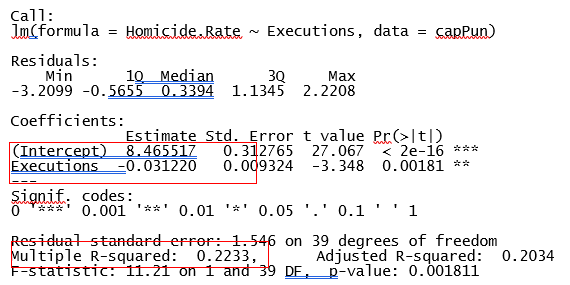


Again, this is a lot of output to digest! But for the purpose of this practical, you just need to look at three things, 	labelled above: The **Intercept**, the **Slope** (referred to as the Executions Coefficient), and the **R2**, or coefficient of variation (referred to above as the Multiple R-squared). 

Remembering the *y=mx+c* formula for a straight line, we can now substitute our values from above into this formula. This gives us the equation for the best-fit line as:

**Homicide Rate = 8.47 – 0.0312 x Executions** 

R2 is 0.223. This is not a strong fit – it means 22% of the variation in Homicide Rate is explained by Executions. What other things might explain the other 78% of the variation?

From the formula above, what is the predicted homicide rate if there are 20 executions in a year? If there are 40? To calculate these we just need to substitute the values into the formula above. To do these calculations you can use a calculator but this is a good opportunity to highlight that R can be used as a calculator using the `/ * + -` symbols. 

So, to predict the homicide rate with 20 executions in a year you would paste the following into the code cell:

`8.47-(0.0312*20)`

To predict with 40 executions, you would do:

`8.47-(0.0312*40)`

***
## Exercise 6

The history lesson on page 2 was given for a reason. You can expect the socio-political landscape change was different after the reintroduction of the death penalty, and it may not make sense to consider the entire 1960-2000 period all as one set of data. 

Using some of the things you learned from last week (you may want to have last weeks notebook open to remind you and to refer to!), create a new dataset as a subset of the current one. Choose only the data from **after** 1976. 

With this new dataset, find the pearson correlation between Executions and Homicide Rate. How does it compare to the previous correlation value, i.e. is it stronger or weaker? There is no need to carry out a Linear Regression (though you can if you wish!), but do you think the R2 value would be larger or smaller than before?

With this new dataset, create a scatterplot of Executions and Homicide Rate. Does it look different than before? In what way?  Is this consistent with the updated correlation strength you have found?

HINT: YOu'll need the `filter()`, `cor.test()`, `lm()` and `ggplot()` commands for all of this! Remember the answers are below if you get stuck...

***

## Exercise answers

1. To view the Tay data use: `NameOfData`, `head()` and `dim()

2. To create various new aggregated datasets: 
a. For minimum values: `TayMin<- aggregate(Flowrate ~ Year, data=tay, FUN=min)`
b. For maximum values: `TayAvg<- aggregate(Flowrate ~ Year, data=tay, FUN=max)` 
c. For Standard deviation: `TayAvg<- aggregate(Flowrate ~ Year, data=tay, FUN=sd)`
d. To sum the values: `TayAvg<- aggregate(Flowrate ~ Year, data=tay, FUN=sum)`

3. To create a line graph with points, use: `ggplot(CapPun, aes(year, homicide_rate)) + geom_point()`

4. To generate a new line graph plot for the *executions* variable, use: `ggplot(CapPun, aes(year, executions)) + geom_line()`

5. To produce a scatterplot of executions against homicides with a linear line of best fit, use: `ggplot(CapPun, aes(executions, homicides)) + geom_point() + geom_smooth(method = "lm") + labs(x = "Executions", y = "Homicides", title = "Scatter of Homicides and Executions")` 

6. This exercise has many steps! In order:
a. To create the new dataset (I have called mine `after1976`) : `after1976 <- filter(CapPun, year > 1976)`
b. To calculate the correlation between Executions and Homicide Rate, use: `cor.test(after1976$homicide_rate, after1976$executions, method = "pearson")`
c. Optional regression analysis: `model <- lm(formula = homicide_rate ~ executions, data = after1976)` and then run `summary(model)`
d. To create the scatterplot of Executions and Homicide Rate: `ggplot(after1976, aes(executions, homicide_rate)) + geom_point() + geom_smooth(method = "lm") + labs(x = "Executions", y = "Homicide Rate", title = "Scatter of Homicide Rate and Executions")`